# About the dataset

## Background
* At the end of 2017 the Civil Comments platform shut down and chose make their ~2m public comments from their platform available in a lasting open archive so that researchers could understand and improve civility in online conversations for years to come. Jigsaw sponsored this effort and extended annotation of this data by human raters for various toxic conversational attributes.

* In the data supplied for this competition, the text of the individual comment is found in the comment_text column. Each comment in Train has a toxicity label (target), and models should predict the target toxicity for the Test data. This attribute (and all others) are fractional values which represent the fraction of human raters who believed the attribute applied to the given comment. For evaluation, test set examples with target >= 0.5 will be considered to be in the positive class (toxic).

* The data also has several additional toxicity subtype attributes. Models do not need to predict these attributes for the competition, they are included as an additional avenue for research. Subtype attributes are:
  * severe_toxicity
  * obscene
  * threat
  * insult
  * identity_attack
  * sexual_explicit

* Additionally, a subset of comments have been labelled with a variety of identity attributes, representing the identities that are mentioned in the comment. The columns corresponding to identity attributes are listed below. Only identities with more than 500 examples in the test set (combined public and private) will be included in the evaluation calculation. These identities are shown in bold.
   * male
   * female
   * transgender
   * other_gender
   * heterosexual
   * homosexual_gay_or_lesbian
   * bisexual
   * other_sexual_orientation
   * christian
   * jewish
   * muslim
   * hindu
   * buddhist
   * atheist
   * other_religion
   * black
   * white
   * asian
   * latino
   * other_race_or_ethnicity
   * physical_disability
   * intellectual_or_learning_disability
   * psychiatric_or_mental_illness
   * other_disability

* Note that the data contains different comments that can have the exact same text. Different comments that have the same text may have been labeled with different targets or subgroups.

## Examples
* Here are a few examples of comments and their associated toxicity and identity labels. Label values range from 0.0 - 1.0 represented the fraction of raters who believed the label fit the comment.

1.**Comment**: i'm a white woman in my late 60's and believe me, they are not too crazy about me either!!
* **Toxicity Labels**: All 0.0
* **Identity Mention Labels**: female: 1.0, white: 1.0 (all others 0.0)

2.**Comment**: Why would you assume that the nurses in this story were women?
* **Toxicity Labels**: All 0.0
* **Identity Mention Labels**: female: 0.8 (all others 0.0)

3.**Comment**: Continue to stand strong LGBT community. Yes, indeed, you'll overcome and you have.
* **Toxicity Label**s: All 0.0
* **Identity Mention Labels**: homosexual_gay_or_lesbian: 0.8, bisexual: 0.6, transgender: 0.3 (all others 0.0)

* In addition to the labels described above, the dataset also provides metadata from Jigsaw's annotation: toxicity_annotator_count and identity_annotator_count, and metadata from Civil Comments: created_date, publication_id, parent_id, article_id, rating, funny, wow, sad, likes, disagree. Civil Comments' label rating is the civility rating Civil Comments users gave the comment.

## Labelling Schema
* To obtain the toxicity labels, each comment was shown to up to 10 annotators*. Annotators were asked to: "Rate the toxicity of this comment"
   * Very Toxic (a very hateful, aggressive, or disrespectful comment that is very likely to make you leave a discussion or give up on sharing your perspective)
   * Toxic (a rude, disrespectful, or unreasonable comment that is somewhat likely to make you leave a discussion or give up on sharing your perspective)
   * Hard to Say
   * Not Toxic

* These ratings were then aggregated with the target value representing the fraction of annotations that annotations fell within the former two categories.

* To collect the identity labels, annotators were asked to indicate all identities that were mentioned in the comment. An example question that was asked as part of this annotation effort was: "What genders are mentioned in the comment?"
   * Male
   * Female
   * Transgender
   * Other gender
   * No gender mentioned

* Again, these were aggregated into fractional values representing the fraction of raters who said the identity was mentioned in the comment.

* The distributions of labels and subgroup between Train and Test can be assumed to be similar, but not exact.

* Note: Some comments were seen by many more than 10 annotators (up to thousands), due to sampling and strategies used to enforce rater accuracy.

## Annotators
* Toxicity and identity labeling was done in 2018 on the Figure Eight crowd rating platform, which has since been purchased by Appen. Annotators came from all over the world, and all were proficient in English.

* Raters were compensated 1.5 cents per judgment, a rate that was set based on two factors: what rates were competitive on the platform and targeting an hourly wage appropriate for raters' locales.

* Figure Eight offers raters the option to select from multiple tasks with different pay, so rates need to be competitive to attract enough raters. At a rate of 1.5 cents per judgment, enough raters participated to complete this annotation in a few weeks. Following task completion, raters were given a satisfaction survey where the average score for "Pay" was 3.8 out of 5, which aligned with Figure Eight's recommendation to target pay to a satisfaction score greater than 3.5.

* Hourly rates for workers depend on how fast judgements were completed. Most raters will have earned between $0.90/hour (at one comment per minute) to $5.40/hour (at 6 comments per minute), which aligns with typical hourly pay in the geographic regions where most raters are located.

* Since this dataset was annotated in 2018, more tools have become available to help set rates. Consequently, typical pay for data annotation is increasing globally.

## File descriptions
* **train.csv** - the training set, which includes toxicity labels and subgroups
* **test.csv** - the test set, which does not include toxicity labels or subgroups
* **sample_submission.csv** - a sample submission file in the correct format

The following files were added post-competition close, to use for additional research. Learn more here.
* **test_public_expanded.csv** - The public leaderboard test set, including toxicity labels and subgroups. The competition target was a binarized version of the toxicity column, which can be easily reconstructed using a >=0.5 threshold.
* **test_private_expanded.csv** - The private leaderboard test set, including toxicity labels and subgroups. The competition target was a binarized version of the toxicity column, which can be easily reconstructed using a >=0.5 threshold.
* **toxicity_individual_annotations.csv** - The individual rater decisions for toxicity questions. Columns are:
   * **id** - The comment id. Corresponds to id field in train.csv, test_public_labeled.csv, or test_private_labeled.csv.
   * **worker** - The id of the individual annotator. These worker ids are shared between toxicity_individual_annotations.csv and identity_individual_annotations.csv.
   * **toxic** - 1 if the worker said the comment was toxic, 0 otherwise.
   * **severe_toxic** - 1 if the worker said the comment was severely toxic, 0 otherwise. Note that any comment that was considered severely toxic was also considered toxic.
   * **identity_attack, insult, obscene, sexual_explicit, threat** - Toxicity subtype attributes. 1 if the worker said the comment exhibited each of these traits, 0 otherwise.

* **identity_individual_annoations.csv** - The individual rater decisions for identity questions. Columns are:
   * **id** - The comment id. Corresponds to id field in train.csv, test_public_labeled.csv, or test_private_labeled.csv.
   * **worker** - The id of the individual annotator. These worker ids are shared between toxicity_individual_annotations.csv and toxicity_individual_annotations.csv.
   * **disability, gender, race_or_ethnicity, religion, sexual_orientation** - The list of identities within this category that the rater noticed in the comment. Formatted a space-separated strings.

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, PorterStemmer
import math
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc, mean_squared_error, make_scorer
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
import gensim
import tensorflow as tf
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Embedding
import warnings
import tensorflow.keras.backend as K
from tensorflow.keras.utils import get_custom_objects

* **WordCloud** is a class in the wordcloud library that is used to generate word clouds. A word cloud is a visual representation of text data, where the size of each word indicates its frequency or importance. This class allows you to customize the appearance of the word cloud (e.g., size, font, colors).

### Differences between "from wordcloud import STOPWORDS" and "from nltk.corpus import stopwords"
* **wordcloud.STOPWORDS** - Comes from the wordcloud library, which is primarily used for generating word clouds. Contains a predefined set of common English stopwords that are used to filter out unimportant words in word clouds. Contains a fixed set of common stopwords tailored for quick use in word clouds. Easier to use for simple applications but less flexible for advanced NLP tasks.

* **nltk.corpus.stopwords** - Comes from the NLTK (Natural Language Toolkit) library, which is a comprehensive suite of tools for natural language processing (NLP) in Python. Provides a more extensive collection of stopwords for various languages, not just English. The stopwords are part of the corpus module within NLTK and need to be downloaded before use. Offers a more extensive and customizable set of stopwords. Suitable for more advanced and language-specific NLP tasks. Allows users to filter stopwords by language and provides tools for adding or removing stopwords from the list.

* In summary, while both provide stopwords for filtering out common words, wordcloud.STOPWORDS is more specialized and straightforward for generating word clouds, whereas nltk.corpus.stopwords offers greater flexibility and is part of a larger suite of NLP tools.

### PorterStemmer
* **Algorithm:** The Porter stemming algorithm, created by Martin Porter in 1980, is one of the oldest and most widely used stemming algorithms.

* **Characteristics:**
   * Uses a series of rules to remove common morphological and inflexional endings from words in English.
   * It's simple and relatively fast.
   * It can sometimes be aggressive, resulting in stems that are not always actual words.

* **Usage**: Suitable for simple and quick stemming tasks where over-stemming is not a significant issue.  

### SnowballStemmer
* **Algorithm:** Also created by Martin Porter, the Snowball stemming algorithm (sometimes referred to as the "Porter2" stemmer) is an improvement over the original Porter stemmer.

* **Characteristics:**
   * More sophisticated and generally produces better results than the original Porter stemmer.
   * Supports multiple languages, making it more versatile for multilingual NLP tasks.
   * Often less aggressive and more accurate in producing stems that resemble actual words.

* **Usage:** Preferred for more complex stemming tasks and for handling multiple languages.

### Key Differences:
* **Complexity and Accuracy:** SnowballStemmer is generally more complex and accurate compared to PorterStemmer.

* **Language Support:** SnowballStemmer supports multiple languages, while PorterStemmer is specifically designed for English.

* **Aggressiveness:** PorterStemmer can be more aggressive, sometimes leading to stems that are less intuitive, while SnowballStemmer tends to be less aggressive and produces more accurate stems.

### When to Use:
* **PorterStemmer:** When you need a quick, simple stemmer for English text and over-stemming is not a significant concern.

* **SnowballStemmer:** When you need a more accurate stemmer or when working with multiple languages. It's generally preferred for more sophisticated NLP tasks.

* The **Counter** class is a versatile and efficient tool for counting and managing frequencies of elements in an iterable. Its various methods and operations make it a powerful addition to Python's data analysis and processing toolkit.

* **CountVectorizer** converts a collection of text documents to a matrix of token counts. It tokenizes the text and builds a vocabulary of known words, then encodes the documents as vectors. Each element in the resulting matrix represents the count of a word in the corresponding document.

* **TfidfVectorizer** is similar to CountVectorizer but with an additional step of **term frequency-inverse document frequency (TF-IDF) transformation**. This transformation aims to reflect the importance of a word in a document relative to a collection of documents (corpus). The resulting matrix contains TF-IDF scores instead of raw counts.

* **roc_auc_score** computes the area under the receiver operating characteristic (ROC) curve. This **score is a single value that summarizes the model's ability to distinguish between the positive and negative classes**. It is a **popular metric** for evaluating **binary classifiers**, especially when the **classes are imbalanced**. The value **ranges from 0 to 1**, where **1** indicates a **perfect model** and **0.5** indicates a **model with no discrimination ability (equivalent to random guessing)**.

* **roc_curve** computes the **receiver operating characteristic (ROC)** curve, which is a graphical **representation of a classifier's performance**. It plots the **true positive rate (recall) against the false positive rate at various threshold settings**.

* **TruncatedSVD (Truncated Singular Value Decomposition)** is a **linear dimensionality reduction** technique. It is particularly **useful for reducing the dimensionality of sparse matrices**, such as those produced by **text data vectorization** techniques like **CountVectorizer** and **TfidfVectorizer**.

* The **Embedding layer** in Keras is a powerful and essential component when working with natural language processing (NLP) tasks, especially when dealing with text data. It is used to **convert positive integer representations of words (typically word indices) into dense vectors of fixed size**, which are often **called word embeddings**.

* **1. Input:** Takes a sequence of integers (word indices) as input. The input must be a 2D array of integers, where each integer corresponds to a word in the vocabulary.

* **2. Output:** Produces a 3D tensor of shape (batch_size, sequence_length, output_dim), where output_dim is the dimension of the dense vector for each word.

* **3. Trainable Parameters:** The embedding matrix, which maps word indices to dense vectors, is trainable. During training, the model learns the optimal word embeddings for the given task.

In [2]:
warnings.filterwarnings("ignore")
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [3]:
#Loading the training data
train_df = pd.read_csv("D://New folder//ML//Completed//archive//train.csv", index_col='id', engine='python')
train_df.head()

,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
id,,,,,,,,,,,,,,,,,,,,,
59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [4]:
#Loading the testing data
test_df = pd.read_csv("D://New folder//ML//Completed//archive//test.csv", index_col='id', engine='python')
test_df.head()

,comment_text
id,
7097320,[ Integrity means that you pay your debts.]\n\...
7097321,This is malfeasance by the Administrator and t...
7097322,@Rmiller101 - Spoken like a true elitist. But ...
7097323,"Paul: Thank you for your kind words. I do, in..."
7097324,Sorry you missed high school. Eisenhower sent ...


* In the **engine='python'** parameter specifies which **parsing engine** pandas should use to read the CSV file. By **default**, pandas uses the **C engine**, which is written in C and is generally faster. 

In [5]:
train_df.describe()

,target,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,...,parent_id,article_id,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
count,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,405130.000000,405130.000000,405130.000000,405130.000000,...,1.026228e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06
mean,1.030173e-01,4.582099e-03,1.387721e-02,2.263571e-02,8.115273e-02,9.311271e-03,0.011964,0.003205,0.001884,0.034393,...,3.722687e+06,2.813597e+05,2.779269e-01,4.420696e-02,1.091173e-01,2.446167e+00,5.843688e-01,6.605974e-03,1.439019e+00,8.784694e+00
std,1.970757e-01,2.286128e-02,6.460419e-02,7.873156e-02,1.760657e-01,4.942218e-02,0.087166,0.050193,0.026077,0.167900,...,2.450261e+06,1.039293e+05,1.055313e+00,2.449359e-01,4.555363e-01,4.727924e+00,1.866589e+00,4.529782e-02,1.787041e+01,4.350086e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,6.100600e+04,2.006000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,7.960188e+05,1.601200e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,5.222993e+06,3.321260e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
75%,1.666667e-01,0.000000e+00,0.000000e+00,0.000000e+00,9.090909e-02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,5.775758e+06,3.662370e+05,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,...,6.333965e+06,3.995410e+05,1.020000e+02,2.100000e+01,3.100000e+01,3.000000e+02,1.870000e+02,1.000000e+00,1.866000e+03,4.936000e+03


* Looking at count values of asian,atheist etc columns we see that there are a lot of null values present, but this is OK as we are only supposed to use **comment_text** column so dealing with these is not really necessary here.

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1804874 entries, 59848 to 6334010
Data columns (total 44 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   target                               float64
 1   comment_text                         object 
 2   severe_toxicity                      float64
 3   obscene                              float64
 4   identity_attack                      float64
 5   insult                               float64
 6   threat                               float64
 7   asian                                float64
 8   atheist                              float64
 9   bisexual                             float64
 10  black                                float64
 11  buddhist                             float64
 12  christian                            float64
 13  female                               float64
 14  heterosexual                         float64
 15  hindu                            

In [7]:
train_df.isnull().sum()

target                                       0
comment_text                                 3
severe_toxicity                              0
obscene                                      0
identity_attack                              0
insult                                       0
threat                                       0
asian                                  1399744
atheist                                1399744
bisexual                               1399744
black                                  1399744
buddhist                               1399744
christian                              1399744
female                                 1399744
heterosexual                           1399744
hindu                                  1399744
homosexual_gay_or_lesbian              1399744
intellectual_or_learning_disability    1399744
jewish                                 1399744
latino                                 1399744
male                                   1399744
muslim       

In [8]:
# Checking the shape of the train and test data
print("Train shape : {} \nTest shape : {}".format(train_df.shape, test_df.shape))

Train shape : (1804874, 44) 
Test shape : (97320, 1)


# Exploratory Data Analysis

## 1. Target Variable

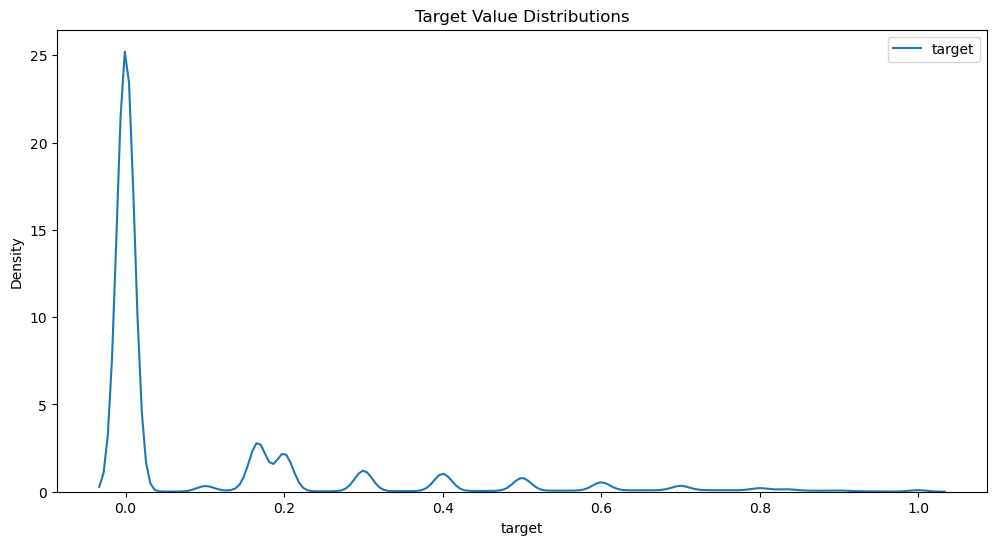

In [9]:
plt.figure(figsize=(12,6))
plt.title("Target Value Distributions")
sns.distplot(train_df['target'], kde=True, hist=False, bins=240, label='target')
plt.legend()
plt.show()

* We see that **most of the comments** present in the dataset are actually **non-toxic** **(< 0.5) and only a few of them are actually toxic (>0.5).**

* If the toxicity rating of the comment < 0.5 then the comment is non-toxic else it is toxic.

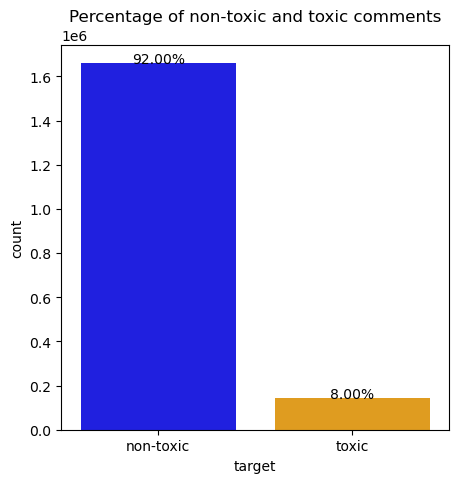

In [10]:
#Getting the toxic and non-toxic comments
temp = train_df['target'].apply(lambda x: "non-toxic" if x < 0.5 else "toxic")

#Plotting the number and percentage of toxic and non-toxic comments.
fig, ax = plt.subplots(1,1,figsize=(5,5))
total = float(len(temp))

#Plotting the count plot.
cntplot = sns.countplot(x=temp, ax=ax, palette={"non-toxic": "blue", "toxic": "orange"})
cntplot.set_title("Percentage of non-toxic and toxic comments")

#Getting the height and calculate the percentage and then display the plot itself.
for p in ax.patches:
    #Getting the height
    height = p.get_height()

    #Plot at appropriate position
    ax.text(p.get_x() + p.get_width() / 2.0, height + 3, '{:1.2f}%'.format(100 * height / total), ha='center')

plt.show()

* The dataset is imbalanced as 92% of the comments are non-toxic and only 8% are toxic.

## 2. Toxicity Subtype Features

In [11]:
def plot_features_distribution(features, title, data):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        sns.distplot(data[feature], kde=True, hist=False, bins=240, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()

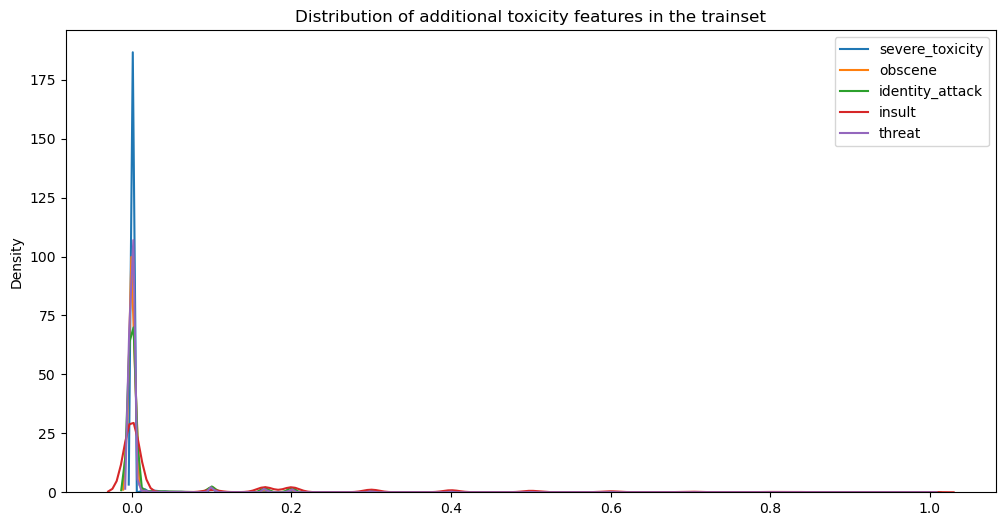

In [12]:
features = ['severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat']
plot_features_distribution(features, "Distribution of additional toxicity features in the trainset", train_df)

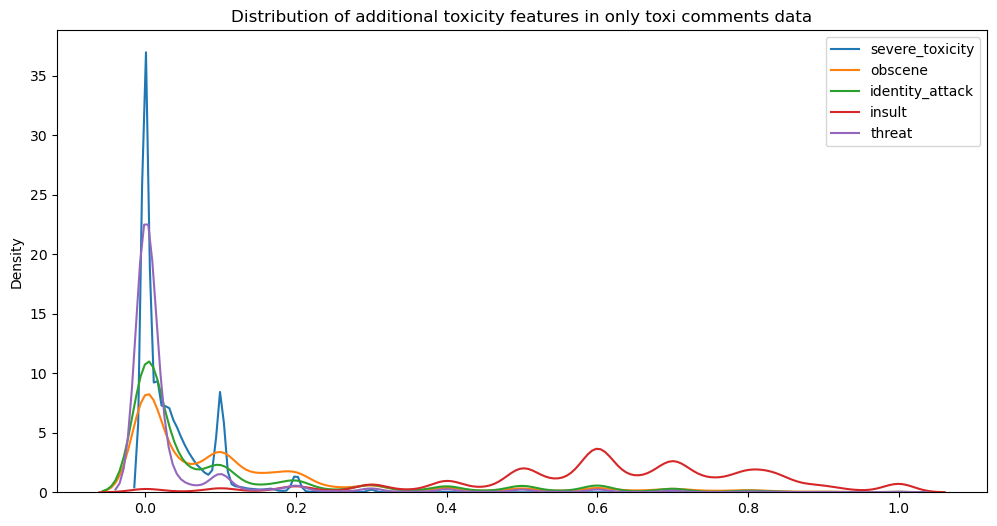

In [13]:
temp = train_df[train_df['target'] > 0.5]
plot_features_distribution(features, "Distribution of additional toxicity features in only toxi comments data", temp)

* We see that for toxic comments data, there are more insulting comments as compared to obscene comments

In [14]:
#Getting the count of additional toxicity features in toxic comments data(temp).
def get_comment_nature(row):
    #Extract type of toxic comment
    row = [row['severe_toxicity'], row['obscene'], row['identity_attack'], row['insult'], row['threat']]
    maxarg = np.argmax(np.array(row))#Get the max value index.

    if maxarg == 0 : return 'severe_toxicity'
    elif maxarg == 1 : return 'obscene'
    elif maxarg == 2 : return 'identity_attack'
    elif maxarg == 3 : return 'insult'
    else : return 'threat'

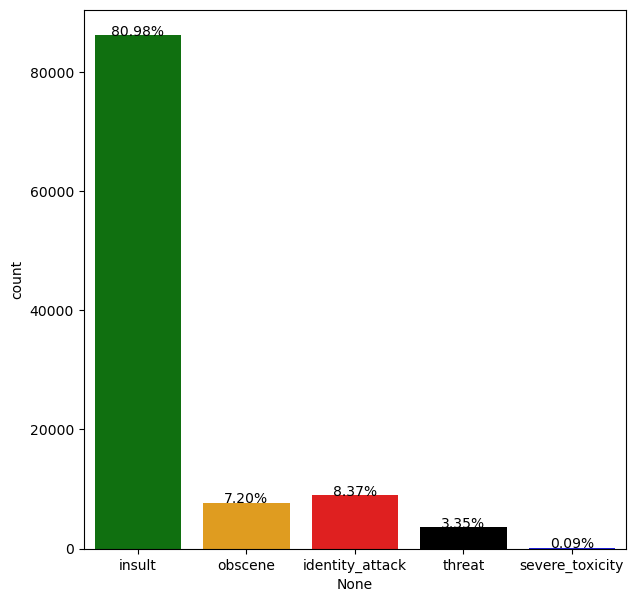

In [15]:
x = temp.apply(get_comment_nature, axis=1) #Getting the nature of each toxic comment
fig, ax = plt.subplots(1,1,figsize=(7,7))
total = float(len(x))

#Plotting the count plot
cntplot = sns.countplot(x=x, ax=ax, palette={"severe_toxicity":"blue","obscene": "orange", "identity_attack":"red", "insult":"green", "threat":"black"})
#x=temp, ax=ax, palette={"non-toxic": "blue", "toxic": "orange"}

#Getting the height and calculating the percentage and then display the plot itself.
for p in ax.patches:
    #Get height
    height = p.get_height()

    #Plotting at the appropriate position
    ax.text(p.get_x() + p.get_width() / 2.0, height + 3, '{:1.2f}%'.format(100 * height / total), ha='center')

plt.show()

* In our train dataset only 8% of the data was toxic. Out of that 8%, 81% of the toxic comments made are insults, 8.37% are identity attacks, 7.20% are obscene, 3.35% are threats and a very small amount of toxic comments are severly toxic.

## 3. Identity Attributes

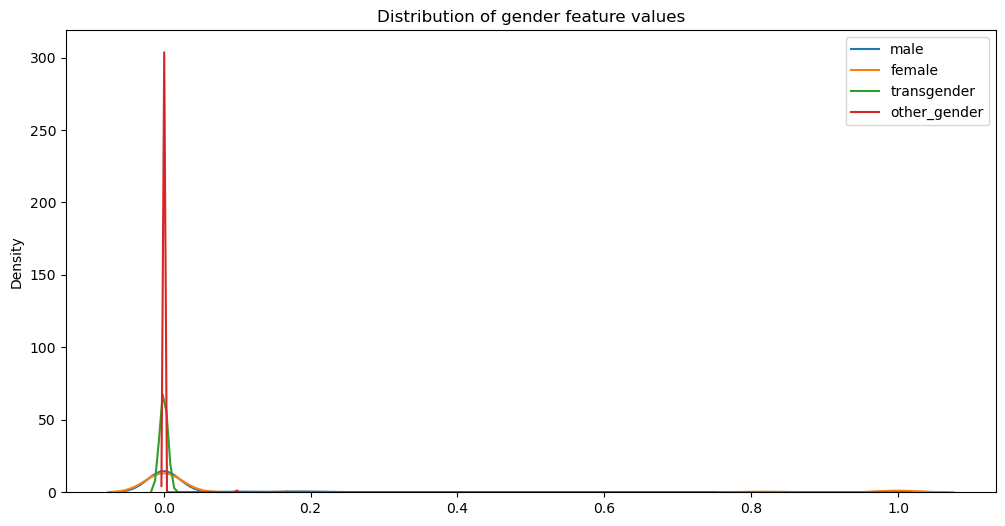

In [16]:
temp = train_df.dropna(axis = 0, how = 'any')
features = ['male', 'female', 'transgender', 'other_gender']
plot_features_distribution(features, "Distribution of gender feature values", temp)

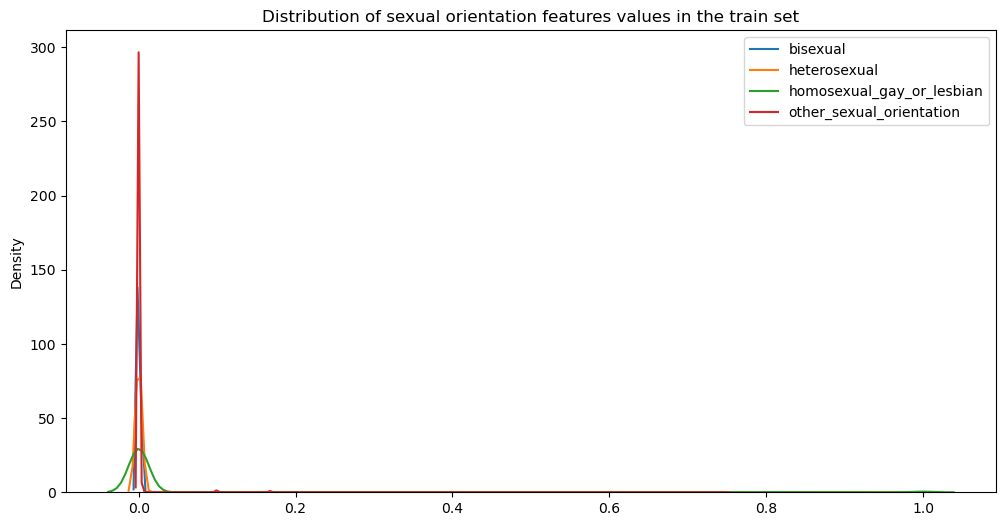

In [17]:
features = ['bisexual', 'heterosexual', 'homosexual_gay_or_lesbian', 'other_sexual_orientation']
plot_features_distribution(features, "Distribution of sexual orientation features values in the train set", temp)

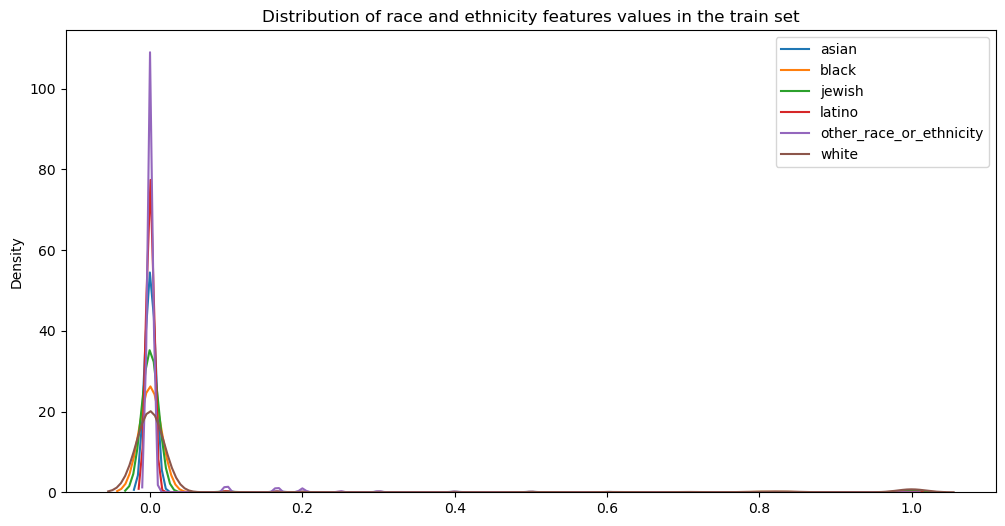

In [18]:
features = ['asian', 'black', 'jewish', 'latino','other_race_or_ethnicity','white']
plot_features_distribution(features, "Distribution of race and ethnicity features values in the train set", temp)

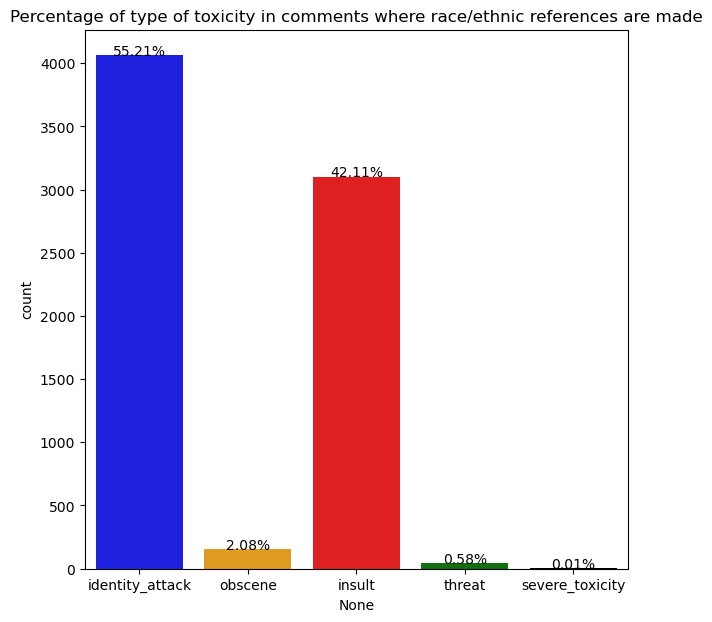

In [19]:
# Getting the data where race/ethnic references are made.
cond = (train_df['asian'] > 0.5) | (train_df['black'] > 0.5) | (train_df['jewish'] > 0.5) | (train_df['latino'] > 0.5) | (train_df['white'] > 0.5)
temp = train_df[cond] #Getting data where ethnic/references are made
temp = temp[temp['target'] > 0.5] #Extracting only the toxic comments

x = temp.apply(get_comment_nature, axis=1) #Getting the nature of each toxic comment

fig,ax = plt.subplots(1,1,figsize=(7,7))
total = float(len(x))

#Plotting the count plot
cntplot = sns.countplot(x=x, ax=ax, palette={"identity_attack":"blue","obscene": "orange", "insult":"red", "threat":"green", "severe_toxicity":"black"})
cntplot.set_title('Percentage of type of toxicity in comments where race/ethnic references are made')

#Getting the height and calculating the percentage and displaying the plot.
for p in ax.patches:
    #Getting the height
    height = p.get_height()

    #Plotting at the appropriate position
    ax.text(p.get_x() + p.get_width() / 2.0, height + 3, '{:1.2f}%'.format(100 * height / total), ha='center')

plt.show()

* We see that the toxic comments involving words like black, asian etc. are mainly used for identity attacks or insults.

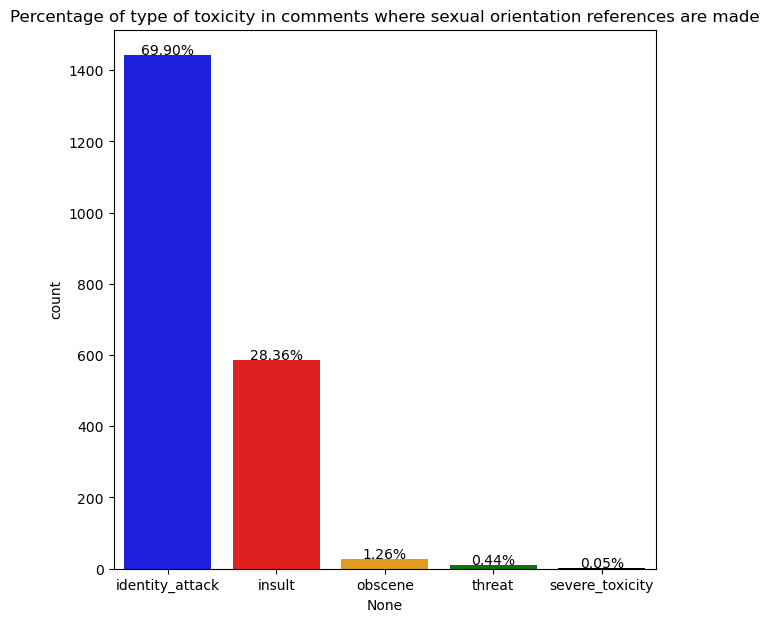

In [20]:
# Getting the data where sexual orientation references are made.
cond = (train_df['bisexual'] > 0.5) | (train_df['heterosexual'] > 0.5) | (train_df['homosexual_gay_or_lesbian'] > 0.5) | (train_df['other_sexual_orientation'] > 0.5)
temp = train_df[cond] #Getting data where sexual orientation references are made
temp = temp[temp['target'] > 0.5] #Extracting only the toxic comments

x = temp.apply(get_comment_nature, axis=1) #Getting the nature of each toxic comment

fig,ax = plt.subplots(1,1,figsize=(7,7))
total = float(len(x))

#Plotting the count plot
cntplot = sns.countplot(x=x, ax=ax, palette={"identity_attack":"blue","obscene": "orange", "insult":"red", "threat":"green", "severe_toxicity":"black"})
cntplot.set_title('Percentage of type of toxicity in comments where sexual orientation references are made')

#Getting the height and calculating the percentage and displaying the plot.
for p in ax.patches:
    #Getting the height
    height = p.get_height()

    #Plotting at the appropriate position
    ax.text(p.get_x() + p.get_width() / 2.0, height + 3, '{:1.2f}%'.format(100 * height / total), ha='center')

plt.show()

* We see from the plot that the toxic comments where sexual orientation references are made are mostly used for identity attacks.

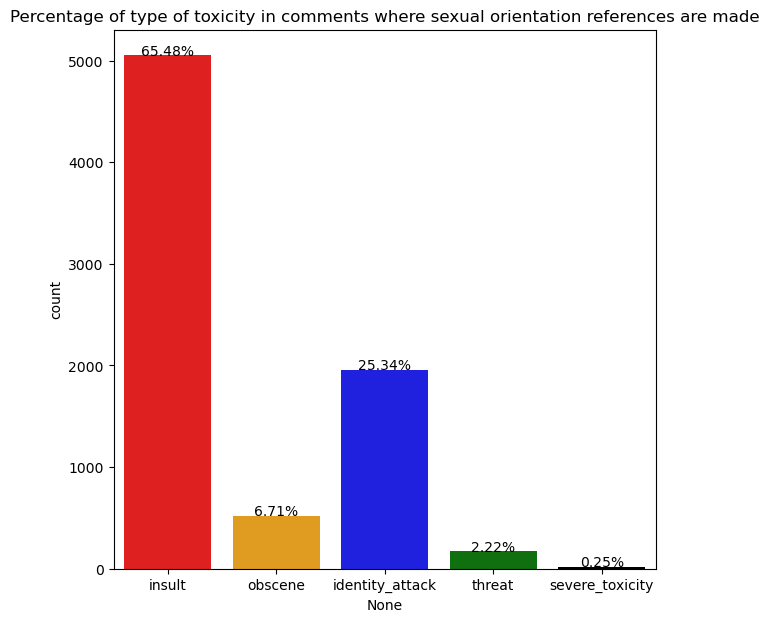

In [21]:
# Getting the data where gender references are made.
cond = (train_df['male'] > 0.5) | (train_df['female'] > 0.5) | (train_df['transgender'] > 0.5) | (train_df['other_gender'] > 0.5)
temp = train_df[cond] #Getting data where gender references are made
temp = temp[temp['target'] > 0.5] #Extracting only the toxic comments

x = temp.apply(get_comment_nature, axis=1) #Getting the nature of each toxic comment

fig,ax = plt.subplots(1,1,figsize=(7,7))
total = float(len(x))

#Plotting the count plot
cntplot = sns.countplot(x=x, ax=ax, palette={"identity_attack":"blue","obscene": "orange", "insult":"red", "threat":"green", "severe_toxicity":"black"})
cntplot.set_title('Percentage of type of toxicity in comments where sexual orientation references are made')

#Getting the height and calculating the percentage and displaying the plot.
for p in ax.patches:
    #Getting the height
    height = p.get_height()

    #Plotting at the appropriate position
    ax.text(p.get_x() + p.get_width() / 2.0, height + 3, '{:1.2f}%'.format(100 * height / total), ha='center')

plt.show()

* From the plot we see that the toxic comments which involve words like male, female etc are insults.

## 4. Features generated using the users feedback

In [22]:
def plot_count(feature, title, data, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(data))
    g = sns.countplot(x=feature, data=data, order = data[feature].value_counts().index[:20], palette='Set3', ax=ax)
    g.set_title("Number and percentage of {}".format(title))
    for p in ax.patches:
        height = p.get_height()
        g.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show() 

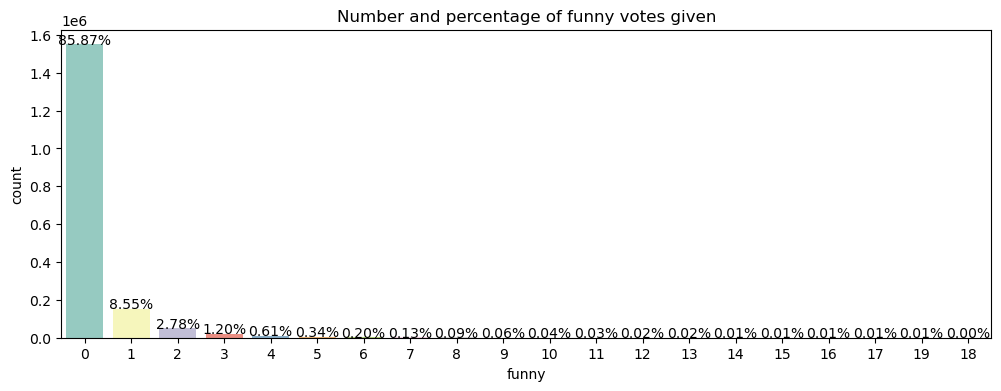

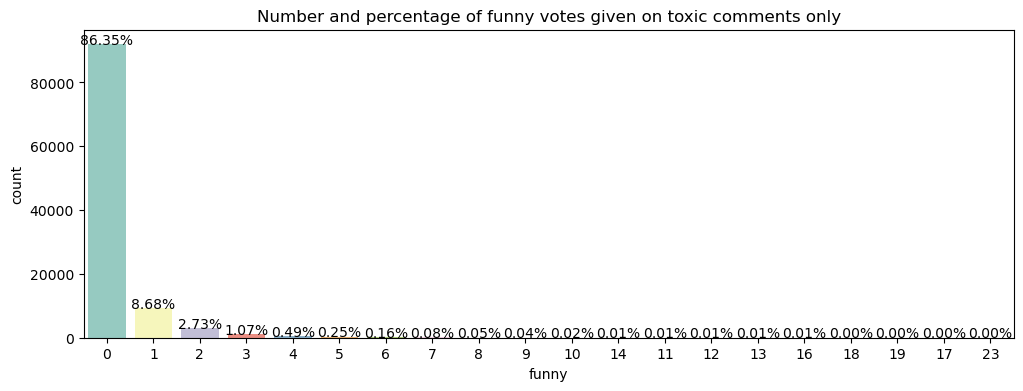

In [23]:
plot_count('funny', 'funny votes given', train_df, 3)
plot_count('funny', 'funny votes given on toxic comments only', train_df[train_df['target'] > 0.5], 3)

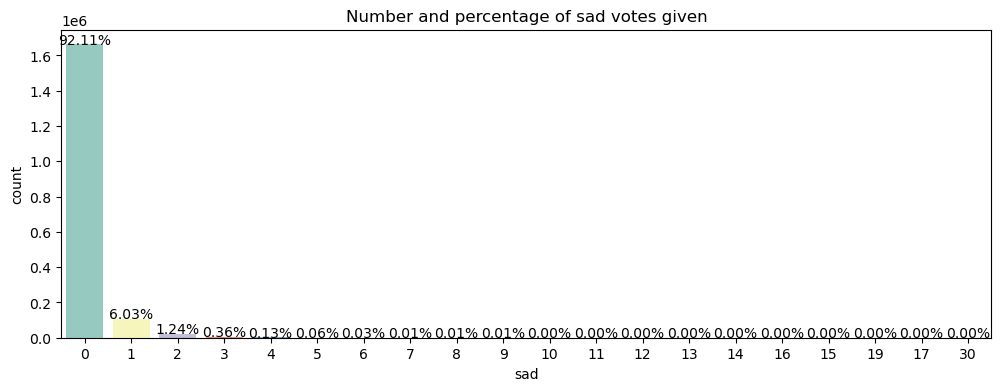

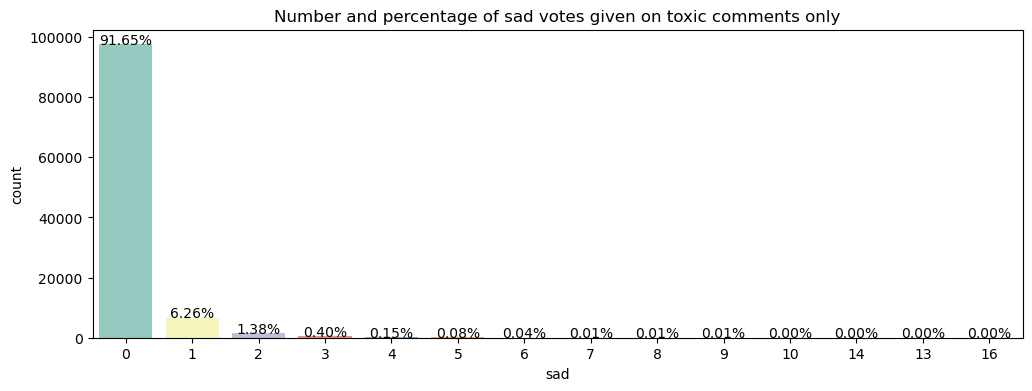

In [24]:
plot_count('sad','sad votes given', train_df, 3)
plot_count('sad', 'sad votes given on toxic comments only', train_df[train_df['target'] > 0.5], 3)

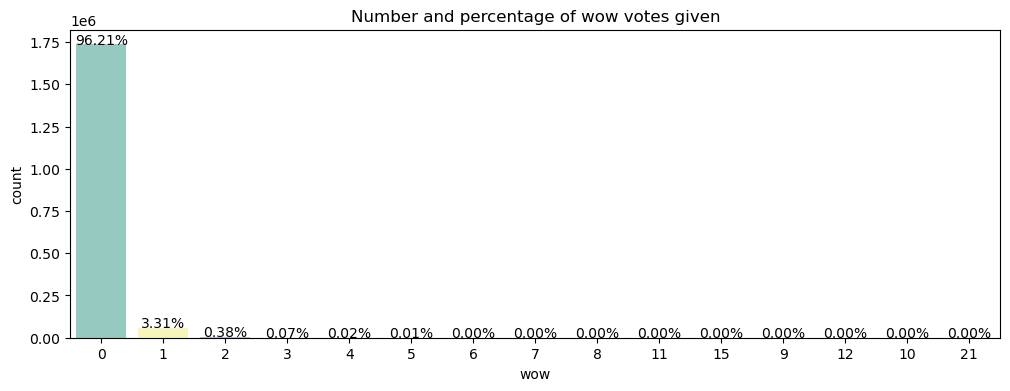

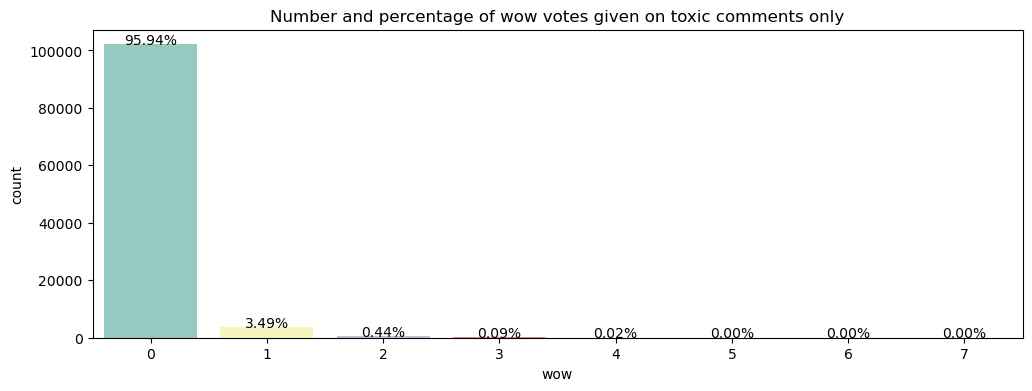

In [25]:
plot_count('wow','wow votes given', train_df, 3)
plot_count('wow', 'wow votes given on toxic comments only', train_df[train_df['target'] > 0.5], 3)

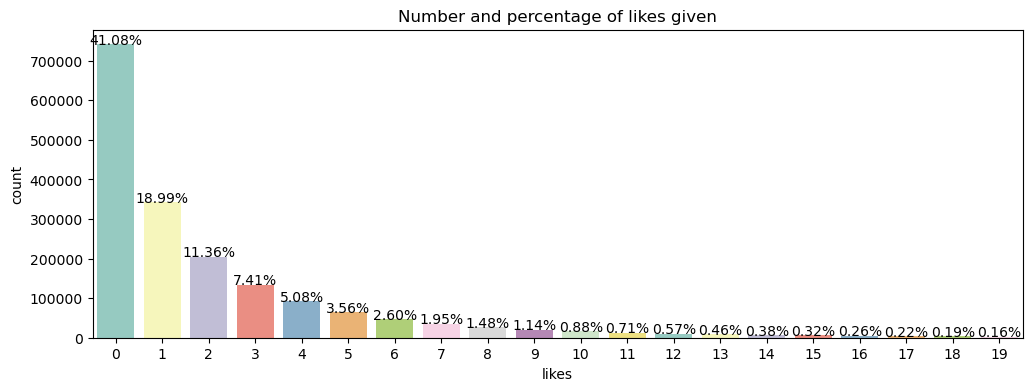

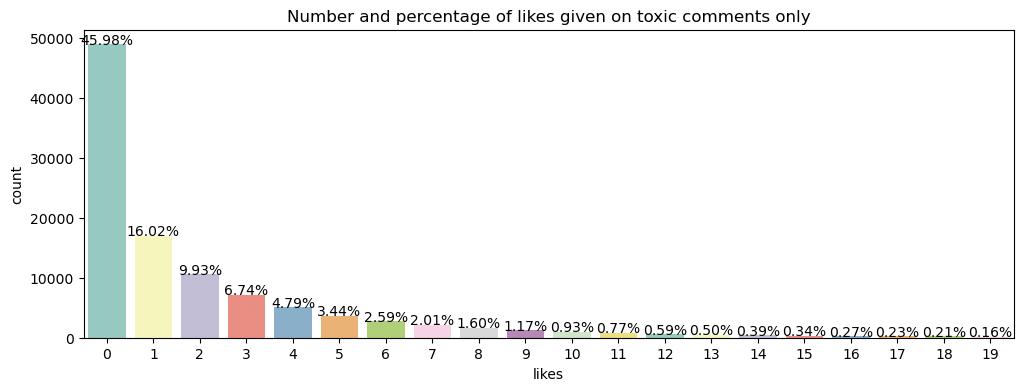

In [26]:
plot_count('likes','likes given', train_df, 3)
plot_count('likes', 'likes given on toxic comments only', train_df[train_df['target'] > 0.5], 3)

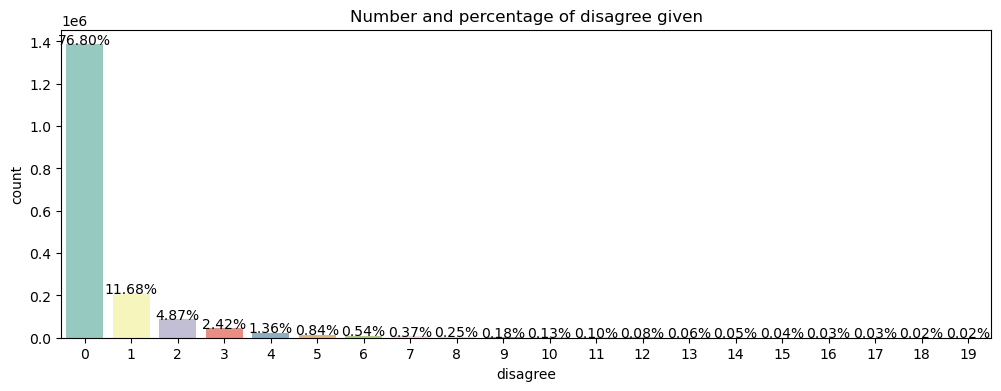

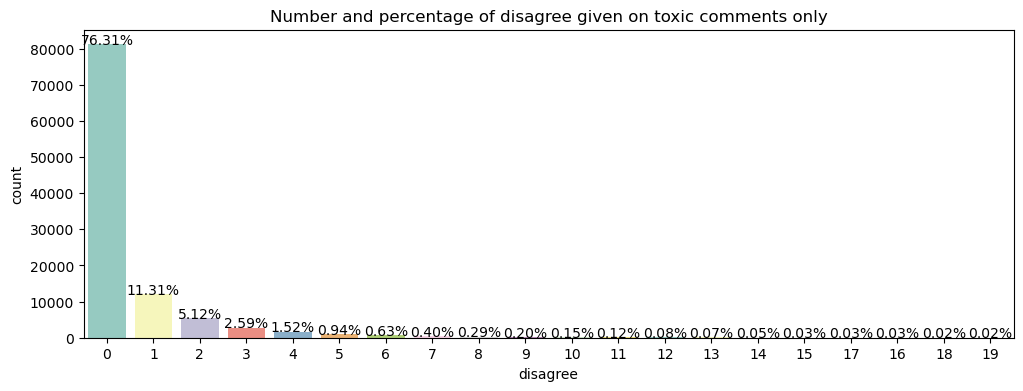

In [27]:
plot_count('disagree','disagree given', train_df, 3)
plot_count('disagree', 'disagree given on toxic comments only', train_df[train_df['target'] > 0.5], 3)

## 5. Comments_text feature

In [28]:
stpwrds = set(STOPWORDS)

def show_wordcloud(data, title=None):
    wordcloud = WordCloud(background_color='white', stopwords=stpwrds, max_words=50, max_font_size=40, scale=5, random_state=1).generate(str(data))
    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

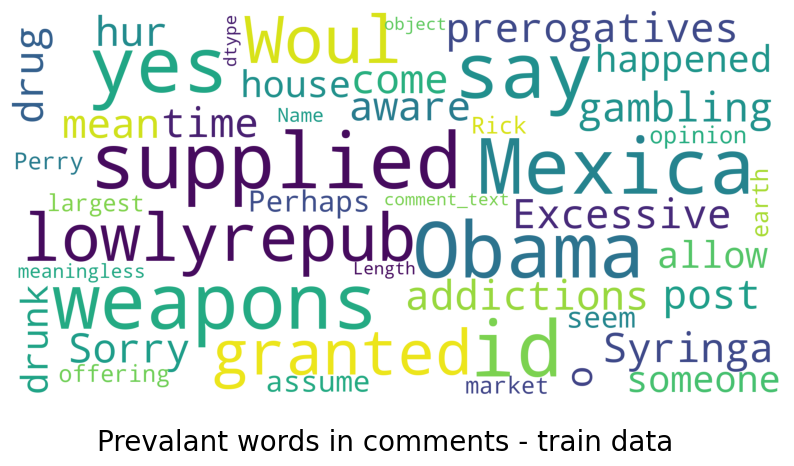

In [29]:
show_wordcloud(train_df['comment_text'].sample(20000), title='Prevalant words in comments - train data')

* The word "prevalent" in the context of "Prevalent words in comments - train data" means the words that occur frequently or commonly in the comments within the training dataset. Essentially, it refers to the most commonly used or dominant words found in the text data of the comments.

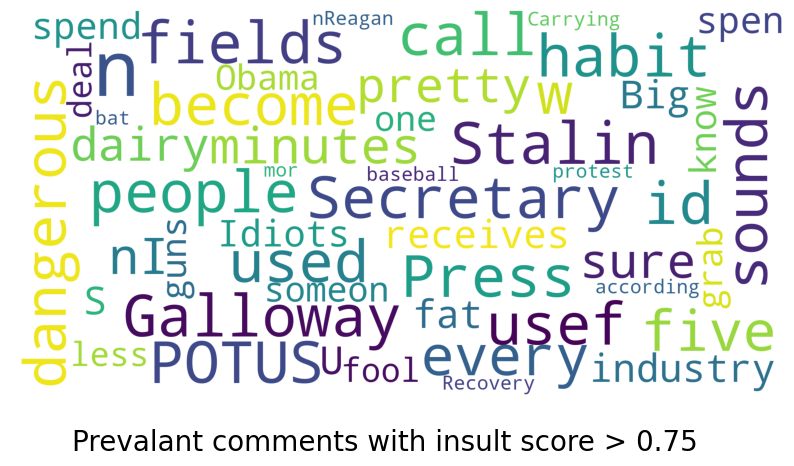

In [30]:
show_wordcloud(train_df.loc[train_df['insult'] > 0.75]['comment_text'].sample(20000), title='Prevalant comments with insult score > 0.75')

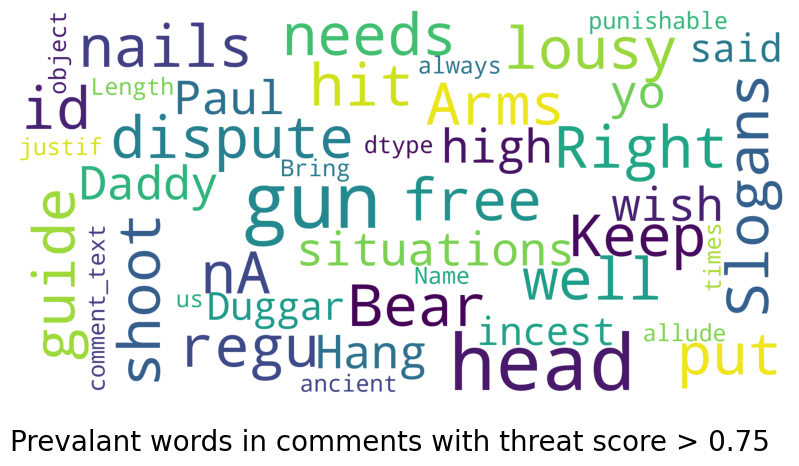

In [31]:
show_wordcloud(train_df.loc[train_df['threat'] > 0.75]['comment_text'], title='Prevalant words in comments with threat score > 0.75')

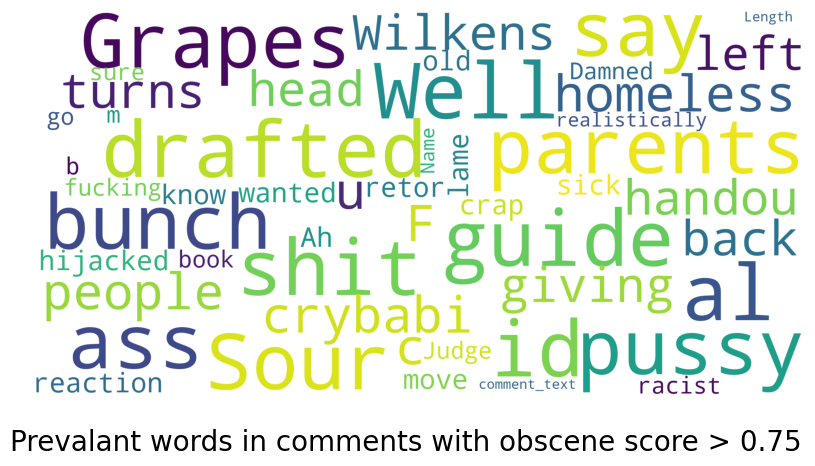

In [32]:
show_wordcloud(train_df.loc[train_df['obscene'] > 0.75]['comment_text'], title='Prevalant words in comments with obscene score > 0.75')

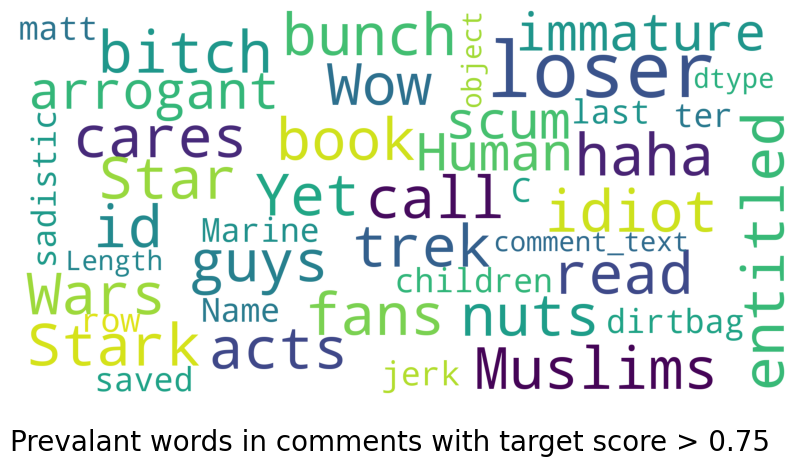

In [33]:
show_wordcloud(train_df.loc[train_df['target'] > 0.75]['comment_text'], title='Prevalant words in comments with target score > 0.75')

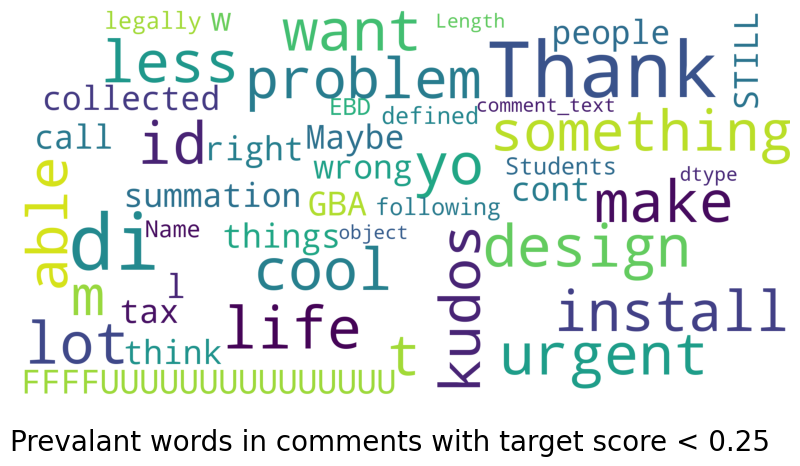

In [34]:
show_wordcloud(train_df.loc[train_df['target'] < 0.25]['comment_text'], title='Prevalant words in comments with target score < 0.25')

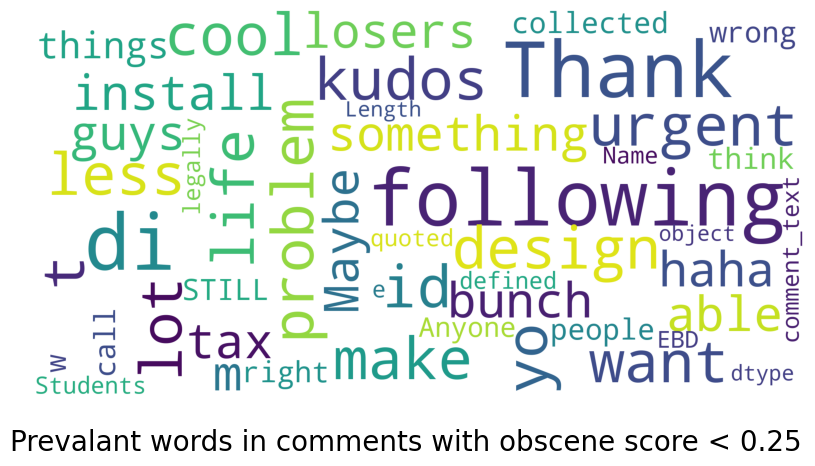

In [35]:
show_wordcloud(train_df.loc[train_df['obscene'] < 0.25]['comment_text'], title='Prevalant words in comments with obscene score < 0.25')

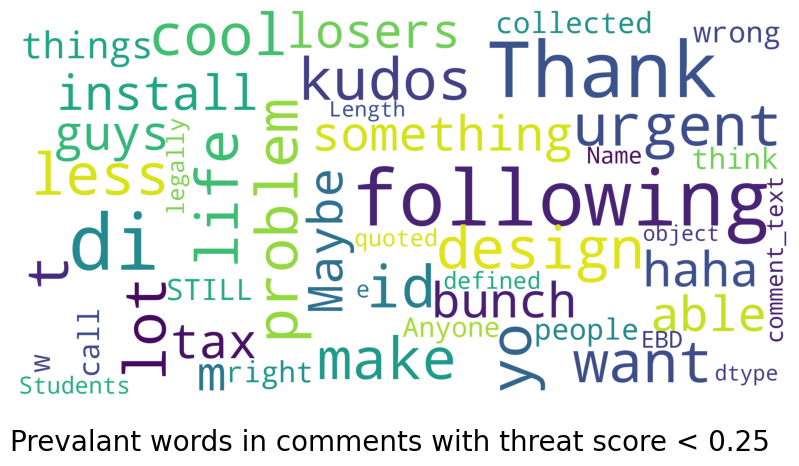

In [36]:
show_wordcloud(train_df.loc[train_df['threat'] < 0.25]['comment_text'], title='Prevalant words in comments with threat score < 0.25')

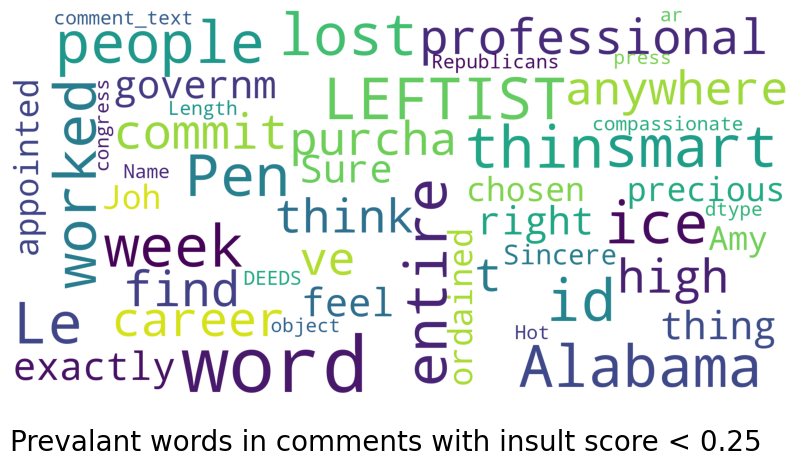

In [37]:
show_wordcloud(train_df.loc[train_df['insult'] < 0.25]['comment_text'].sample(20000), title='Prevalant words in comments with insult score < 0.25')

# Data Preprocessing

In [38]:
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))

In [39]:
def preprocess(text_string):
    # Convert non-string values to string
    if not isinstance(text_string, str):
        text_string = str(text_string)
    text_string = text_string.lower() # Convert everything to lower case.
    text_string = re.sub('[^A-Za-z0-9]+', ' ', text_string) # Remove special characters and punctuations
    
    x = text_string.split()
    new_text = []
    
    for word in x:
        if word not in stop_words:
            new_text.append(stemmer.stem(word))
            
    text_string = ' '.join(new_text)
    return text_string

In [40]:
%%time
train_df['preprocessed_text'] = train_df['comment_text'].apply(preprocess)

CPU times: total: 7min 28s
Wall time: 7min 31s


In [41]:
train_df.head()

,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,preprocessed_text
id,,,,,,,,,,,,,,,,,,,,,
59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,cool like would want mother read realli great ...
59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,thank would make life lot less anxieti induc k...
59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,urgent design problem kudo take impress
59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,someth abl instal site releas
59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,0.0,...,rejected,0,0,0,1,0,0.0,4,47,haha guy bunch loser


In [42]:
%%time
test_df['preprocessed_text'] = test_df['comment_text'].apply(preprocess)

CPU times: total: 24.5 s
Wall time: 24.5 s


In [43]:
feature = train_df[['preprocessed_text']]
output = train_df[['target']]

In [44]:
x_train, x_cv , y_train, y_cv = train_test_split(feature, output)

In [45]:
print(x_train.shape)
print(x_cv.shape)
print(y_train.shape)
print(y_cv.shape)

(1353655, 1)
(451219, 1)
(1353655, 1)
(451219, 1)


In [46]:
x_train.head()

,preprocessed_text
id,
330072,day campaign sign worthless trash anyth hoodlu...
5977688,would certain help thing mainstream peac musli...
6153003,pure batteri ev fine town suffer rang issu cha...
5797930,tip busi owner whine put petul fee bill like p...
5288820,babi abort owner conveni


In [47]:
x_cv.head()

,preprocessed_text
id,
6057523,state shoddi infrastructur like puerto rico ne...
5517385,draw district line base natur geographi road i...
865287,matter low function follow believ anyth claim ...
5455217,miss point harper apolog virtu signal never do...
5308165,well said


In [48]:
x_test = test_df[['preprocessed_text']]
x_test.head()

,preprocessed_text
id,
7097320,integr mean pay debt appli presid trump
7097321,malfeas administr board wast money
7097322,rmiller101 spoken like true elitist look bud a...
7097323,paul thank kind word inde strong belief hide b...
7097324,sorri miss high school eisenhow sent troop vie...


In [49]:
#Exporting the files
x_train.to_pickle('x_train.pkl')
x_cv.to_pickle('x_cv.pkl')
x_test.to_pickle('x_test.pkl')
y_train.to_pickle('y_train.pkl')
y_cv.to_pickle('y_cv.pkl')

# Creating and Training the Models

In [50]:
x_train = pd.read_pickle('x_train.pkl')
x_cv = pd.read_pickle('x_cv.pkl')
x_test = pd.read_pickle('x_test.pkl')
y_train = pd.read_pickle('y_train.pkl')
y_cv = pd.read_pickle('y_cv.pkl')

## 1. The Bag of Words (BoW) Model

In [51]:
cnt_vect = CountVectorizer(ngram_range=(1,2), max_features=30000)
bow_train = cnt_vect.fit_transform(x_train['preprocessed_text'])
bow_cv = cnt_vect.transform(x_cv['preprocessed_text'])
bow_test = cnt_vect.transform(x_test['preprocessed_text'])

* **ngram_range** - Specifies the range of n-gram sizes to be extracted from the text data.

* An n-gram is a contiguous sequence of n items (words or characters) from a given sample of text.

* **ngram_range=(1, 1)**: Extracts **unigrams (single words)**.

* **ngram_range=(1, 2)**: Extracts both **unigrams and bigrams (pairs of consecutive words)**.

* **ngram_range=(2, 2)**: Extracts only **bigrams**.

* **ngram_range=(1, 3)**: Extracts **unigrams, bigrams, and trigrams (triples of consecutive words)**.

* **max_features** - Limits the number of features (tokens or n-grams) to the specified maximum number of most frequent features. Keeps only the top 30,000 most frequent tokens or n-grams in the resulting feature set. If max_features is not set, all unique tokens or n-grams are used.This is useful for reducing the dimensionality of the feature space and can help in reducing computational complexity and memory usage, especially with large text corpora.

In [52]:
print(bow_train.shape)
print(bow_cv.shape)
print(bow_test.shape)

(1353655, 30000)
(451219, 30000)
(97320, 30000)


### 1.1 SGD Regressor

#### 1.1.1 Hyperparameter tuning

In [53]:
#Performing hyperparameter tuning
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
penalty = ['l1', 'l2']
xticks = []
tr_errors = []
cv_errors = []
best_model = None
best_error = 100

In [54]:
for a in alpha:
    for p in penalty:
        xticks.append(str(a) + ' ' + p)
        print(str(a) + ' ' + p + " :")

        model = SGDRegressor(alpha=a, penalty=p)
        model.fit(bow_train, y_train) #Training the model

        preds = model.predict(bow_train) #Making predictions from the training data
        err = mean_squared_error(y_train['target'], preds) # Checking the model accuracy on training data
        tr_errors.append(err)
        print("Mean squared error on train set: ", err)

        preds = model.predict(bow_cv) #Making predictions using the cross validation data
        err = mean_squared_error(y_cv['target'], preds) # Checking the model accuracy on cross validation data
        cv_errors.append(err)
        print("Mean squared error on cross validation data: ", err)

        #Getting the best model
        if err < best_error:
            best_error = err
            best_model = model

        print("*"*50)

1e-05 l1 :
Mean squared error on train set:  0.02490587016733107
Mean squared error on cross validation data:  0.022962532396453638
**************************************************
1e-05 l2 :
Mean squared error on train set:  3.988423087320902
Mean squared error on cross validation data:  0.21634113943334243
**************************************************
0.0001 l1 :
Mean squared error on train set:  0.02450515904558794
Mean squared error on cross validation data:  0.024425401228728147
**************************************************
0.0001 l2 :
Mean squared error on train set:  0.5692747115748225
Mean squared error on cross validation data:  0.04935422207620345
**************************************************
0.001 l1 :
Mean squared error on train set:  0.03146283460580429
Mean squared error on cross validation data:  0.0313344552631936
**************************************************
0.001 l2 :
Mean squared error on train set:  0.0482018298328591
Mean squared error on cros

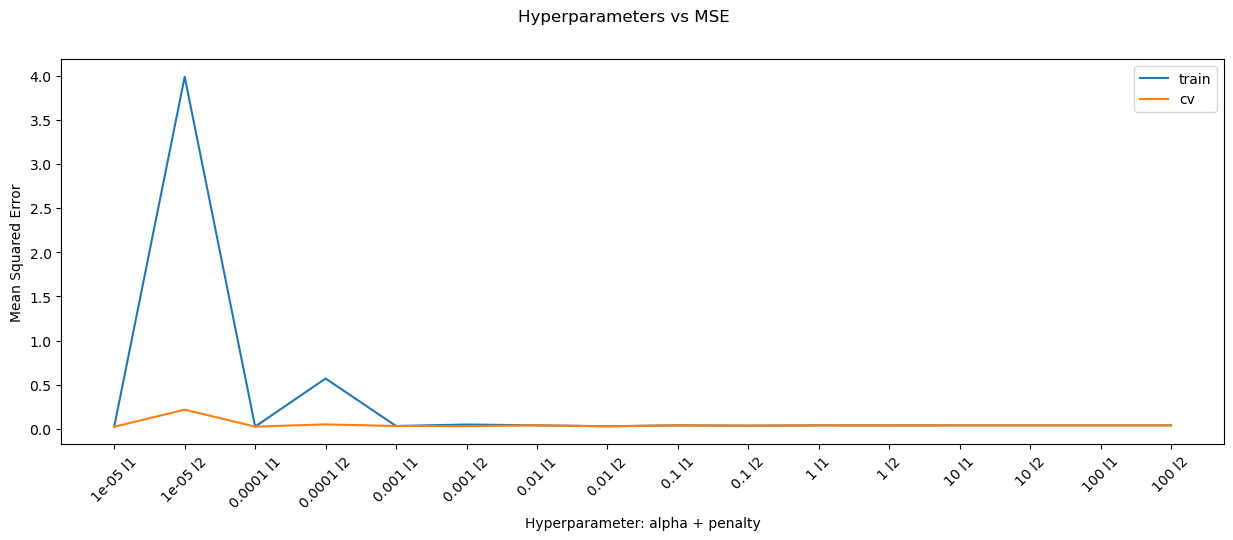

In [55]:
plt.figure(figsize=(15,5))
plt.suptitle("Hyperparameters vs MSE")
plt.plot(range(len(alpha) * len(penalty)), tr_errors)
plt.plot(range(len(alpha) * len(penalty)), cv_errors)
plt.legend(['train', 'cv'])
plt.xticks(range(len(alpha) * len(penalty)), xticks, rotation=45)
plt.xlabel('Hyperparameter: alpha + penalty')
plt.ylabel('Mean Squared Error')
plt.show()

In [56]:
# Getting the best model parameters
best_model.get_params()

{'alpha': 1e-05,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l1',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

#### 1.1.2 Feature Importance

In [57]:
#Printing the 20 most important features/words which contribute for a comment to be toxic
feat_names = cnt_vect.get_feature_names_out()
weights = best_model.coef_
weights

array([0., 0., 0., ..., 0., 0., 0.])

In [58]:
df = pd.DataFrame(data=weights, columns=['weights'], index=feat_names)
df.sort_values("weights", ascending=False).iloc[0:20, :]

,weights
idiot,0.421511
great great,0.383772
stupid,0.343455
moron,0.316748
pathet,0.302356
crap,0.285583
hypocrit,0.273237
scum,0.270456
ass,0.270255
jerk,0.262572


In [59]:
#Printing the 20 most important features/words which contribute for a comment to be non-toxic
df.sort_values("weights", ascending=True).iloc[0:20, :]

,weights
stupid stupid,-0.127441
knee jerk,-0.076105
black white,-0.051495
fool peopl,-0.040347
ignor fact,-0.038661
winner loser,-0.033922
black market,-0.030542
white hous,-0.029846
liar liar,-0.029574
mass shoot,-0.024455


In [60]:
#Performing hyperparameter tuning
max_depth = [3,5,7]
min_samples = [10, 100, 1000]
xticks = []
tr_errors = []
cv_errors = []
best_model = None
best_error = 100

In [61]:
for d in max_depth:
    for samp in min_samples:
        xticks.append("Depth- " + str(d) + ' Min Samples leaf-' + str(samp))
        print("Depth- " + str(d) + ' Min Samples leaf-' + str(samp) + " :")

        model = DecisionTreeRegressor(max_depth=d, min_samples_leaf=samp)
        model.fit(bow_train, y_train) #Training the model

        preds = model.predict(bow_train) #Making predictions from the training data
        err = mean_squared_error(y_train['target'], preds) # Checking the model accuracy on training data
        tr_errors.append(err)
        print("Mean squared error on train set: ", err)

        preds = model.predict(bow_cv) #Making predictions using the cross validation data
        err = mean_squared_error(y_cv['target'], preds) # Checking the model accuracy on cross validation data
        cv_errors.append(err)
        print("Mean squared error on cross validation data: ", err)

        #Getting the best model
        if err < best_error:
            best_error = err
            best_model = model

        print("*"*50)

Depth- 3 Min Samples leaf-10 :
Mean squared error on train set:  0.03312502247629399
Mean squared error on cross validation data:  0.03306555435932094
**************************************************
Depth- 3 Min Samples leaf-100 :
Mean squared error on train set:  0.03312502247629398
Mean squared error on cross validation data:  0.03306555435932094
**************************************************
Depth- 3 Min Samples leaf-1000 :
Mean squared error on train set:  0.03312830593783978
Mean squared error on cross validation data:  0.03306336756855397
**************************************************
Depth- 5 Min Samples leaf-10 :
Mean squared error on train set:  0.032052583165155024
Mean squared error on cross validation data:  0.03194608256923301
**************************************************
Depth- 5 Min Samples leaf-100 :
Mean squared error on train set:  0.03205542377552457
Mean squared error on cross validation data:  0.03194546187490827
************************************

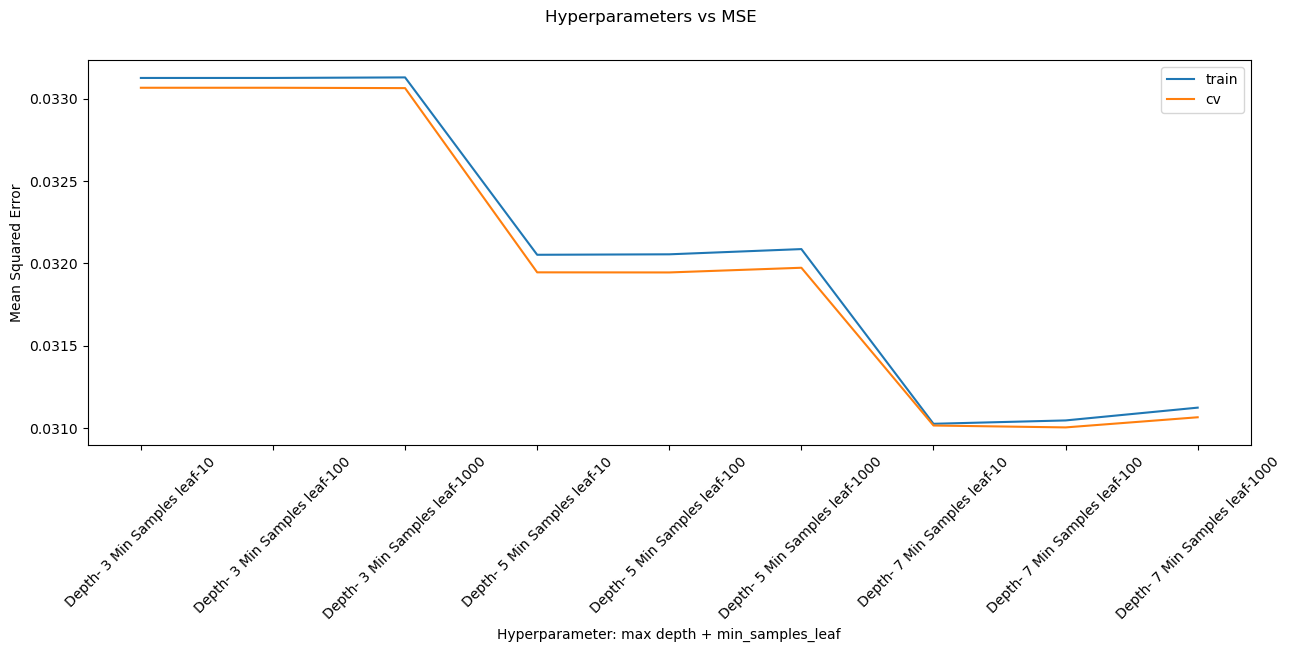

In [62]:
plt.figure(figsize=(15,5))
plt.suptitle("Hyperparameters vs MSE")
plt.plot(range(len(max_depth) * len(min_samples)), tr_errors)
plt.plot(range(len(max_depth) * len(min_samples)), cv_errors)
plt.legend(['train', 'cv'])
plt.xticks(range(len(max_depth) * len(min_samples)), xticks, rotation=45)
plt.xlabel('Hyperparameter: max depth + min_samples_leaf')
plt.ylabel('Mean Squared Error')
plt.show()

In [63]:
# Getting the best model parameters
best_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 100,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

#### 1.2.2 Feature Importance

In [64]:
weights = best_model.feature_importances_
df = pd.DataFrame(data=weights, columns=['weights'], index=feat_names)
df.sort_values("weights", ascending=False).iloc[0:20,:]

,weights
stupid,0.397041
idiot,0.261111
fool,0.070434
pathet,0.067696
moron,0.062002
white,0.059620
hypocrit,0.056983
racist,0.005760
one,0.003872
would,0.003772


## 2. Term Frequency - Inverse Document Frequency (TF-IDF)

In [65]:
tfidf_vec = TfidfVectorizer(ngram_range=(1,2), max_features=30000)
tfidf_train = tfidf_vec.fit_transform(x_train['preprocessed_text'])
tfidf_cv = tfidf_vec.transform(x_cv['preprocessed_text'])
tfidf_test = tfidf_vec.transform(x_test['preprocessed_text'])

In [66]:
print(tfidf_train.shape)
print(tfidf_cv.shape)
print(tfidf_test.shape)

(1353655, 30000)
(451219, 30000)
(97320, 30000)


### 2.1 SGDRegressor

#### 2.1.1 Hyperparameter tuning

In [67]:
#Performing hyperparameter tuning
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
penalty = ['l1', 'l2']
xticks = []
tr_errors = []
cv_errors = []
best_model = None
best_error = 100

In [68]:
for a in alpha:
    for p in penalty:
        xticks.append(str(a) + ' ' + p)
        print(str(a) + ' ' + p + " :")

        model = SGDRegressor(alpha=a, penalty=p)
        model.fit(tfidf_train, y_train) #Training the model

        preds = model.predict(tfidf_train) #Making predictions from the training data
        err = mean_squared_error(y_train['target'], preds) # Checking the model accuracy on training data
        tr_errors.append(err)
        print("Mean squared error on train set: ", err)

        preds = model.predict(tfidf_cv) #Making predictions using the cross validation data
        err = mean_squared_error(y_cv['target'], preds) # Checking the model accuracy on cross validation data
        cv_errors.append(err)
        print("Mean squared error on cross validation data: ", err)

        #Getting the best model
        if err < best_error:
            best_error = err
            best_model = model

        print("*"*50)

1e-05 l1 :
Mean squared error on train set:  0.025294073335185872
Mean squared error on cross validation data:  0.025217156947571127
**************************************************
1e-05 l2 :
Mean squared error on train set:  0.02392691346763665
Mean squared error on cross validation data:  0.023912136252891233
**************************************************
0.0001 l1 :
Mean squared error on train set:  0.02976245012966576
Mean squared error on cross validation data:  0.029647367599848463
**************************************************
0.0001 l2 :
Mean squared error on train set:  0.025040535981847595
Mean squared error on cross validation data:  0.025018602436160272
**************************************************
0.001 l1 :
Mean squared error on train set:  0.038312813302246784
Mean squared error on cross validation data:  0.038230401298081175
**************************************************
0.001 l2 :
Mean squared error on train set:  0.030081781537701812
Mean squared e

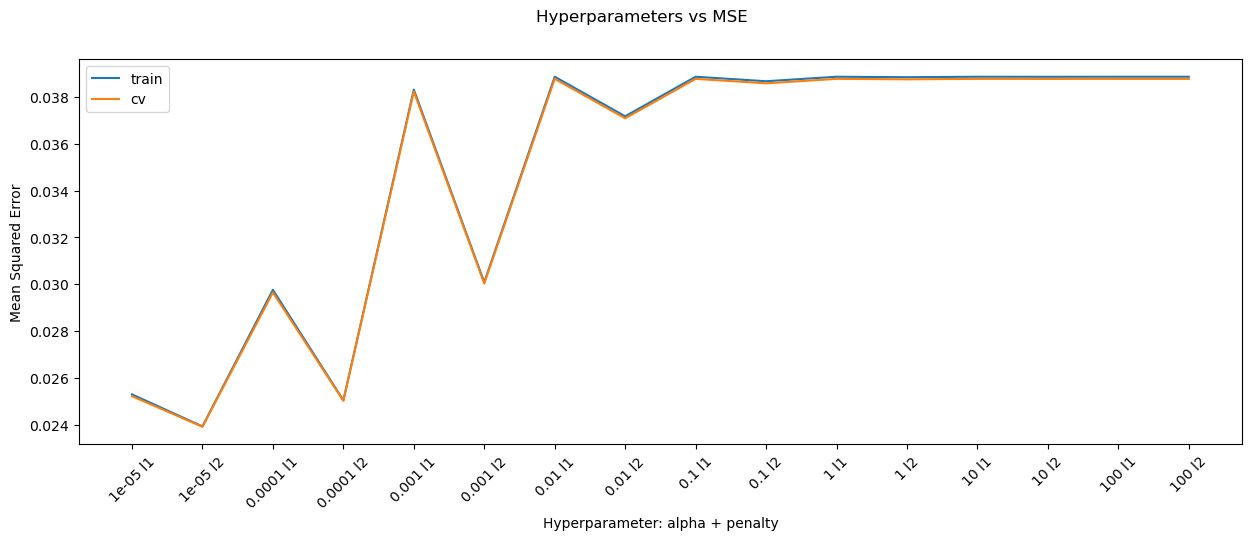

In [69]:
plt.figure(figsize=(15,5))
plt.suptitle("Hyperparameters vs MSE")
plt.plot(range(len(alpha) * len(penalty)), tr_errors)
plt.plot(range(len(alpha) * len(penalty)), cv_errors)
plt.legend(['train', 'cv'])
plt.xticks(range(len(alpha) * len(penalty)), xticks, rotation=45)
plt.xlabel('Hyperparameter: alpha + penalty')
plt.ylabel('Mean Squared Error')
plt.show()

#### 2.1.2 Feature Importance

In [70]:
#Printing the 20 most important features/words which contribute for a comment to be toxic
feat_names = tfidf_vec.get_feature_names_out()
weights = best_model.coef_
df = pd.DataFrame(data=weights, columns=['weights'], index=feat_names)
df.sort_values("weights", ascending=False).iloc[0:20, :]

,weights
stupid,1.564393
idiot,1.260753
fool,0.667075
ignor,0.610154
dumb,0.589185
pathet,0.588374
moron,0.569812
ridicul,0.568498
loser,0.555920
hypocrit,0.519225


In [71]:
df.sort_values("weights", ascending=True).iloc[0:20, :]

,weights
thank,-0.092097
interest,-0.085121
stori,-0.079786
agre,-0.078696
may,-0.073293
great,-0.073070
new,-0.068930
good,-0.067938
chang,-0.067227
differ,-0.067053


### 2.2 Decision Trees

#### 2.2.1 Hyperparameter tuning

In [72]:
#Performing hyperparameter tuning
max_depth = [3,5,7]
min_samples = [10, 100, 1000]
xticks = []
tr_errors = []
cv_errors = []
best_model = None
best_error = 100

In [73]:
for d in max_depth:
    for samp in min_samples:
        xticks.append("Depth- " + str(d) + ' Min Samples leaf-' + str(samp))
        print("Depth- " + str(d) + ' Min Samples leaf-' + str(samp) + " :")

        model = DecisionTreeRegressor(max_depth=d, min_samples_leaf=samp)
        model.fit(tfidf_train, y_train) #Training the model

        preds = model.predict(tfidf_train) #Making predictions from the training data
        err = mean_squared_error(y_train['target'], preds) # Checking the model accuracy on training data
        tr_errors.append(err)
        print("Mean squared error on train set: ", err)

        preds = model.predict(tfidf_cv) #Making predictions using the cross validation data
        err = mean_squared_error(y_cv['target'], preds) # Checking the model accuracy on cross validation data
        cv_errors.append(err)
        print("Mean squared error on cross validation data: ", err)

        #Getting the best model
        if err < best_error:
            best_error = err
            best_model = model

        print("*"*50)

Depth- 3 Min Samples leaf-10 :
Mean squared error on train set:  0.032920468692200854
Mean squared error on cross validation data:  0.03285678481186394
**************************************************
Depth- 3 Min Samples leaf-100 :
Mean squared error on train set:  0.032920468692200854
Mean squared error on cross validation data:  0.03285678481186395
**************************************************
Depth- 3 Min Samples leaf-1000 :
Mean squared error on train set:  0.03292046869220086
Mean squared error on cross validation data:  0.032856784811863944
**************************************************
Depth- 5 Min Samples leaf-10 :
Mean squared error on train set:  0.03179064656117089
Mean squared error on cross validation data:  0.031701548927713985
**************************************************
Depth- 5 Min Samples leaf-100 :
Mean squared error on train set:  0.0317950549706246
Mean squared error on cross validation data:  0.03170664734638312
**********************************

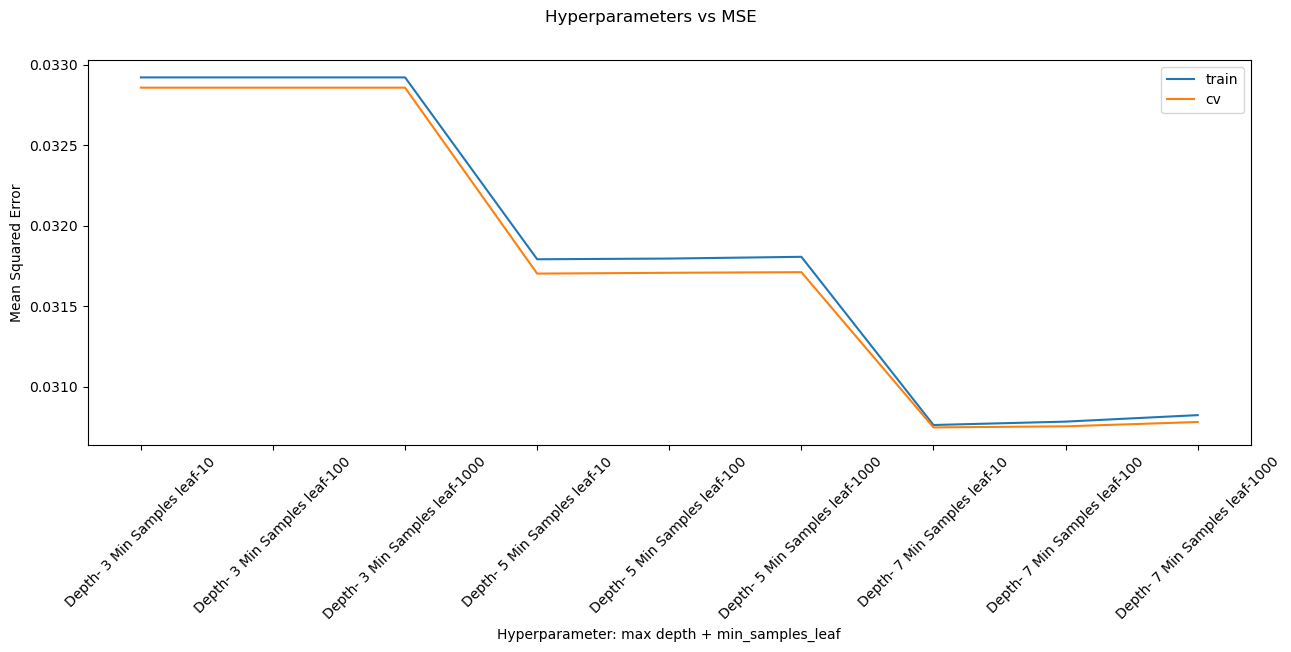

In [74]:
plt.figure(figsize=(15,5))
plt.suptitle("Hyperparameters vs MSE")
plt.plot(range(len(max_depth) * len(min_samples)), tr_errors)
plt.plot(range(len(max_depth) * len(min_samples)), cv_errors)
plt.legend(['train', 'cv'])
plt.xticks(range(len(max_depth) * len(min_samples)), xticks, rotation=45)
plt.xlabel('Hyperparameter: max depth + min_samples_leaf')
plt.ylabel('Mean Squared Error')
plt.show()

#### 2.2.2 Feature Importance

In [75]:
weights = best_model.feature_importances_
df = pd.DataFrame(data=weights, columns=['weights'], index=feat_names)
df.sort_values("weights", ascending=False).iloc[0:20,:]

,weights
stupid,0.405368
idiot,0.264742
fool,0.073700
pathet,0.069596
moron,0.063290
white,0.058470
hypocrit,0.055118
racist,0.005619
trump,0.000668
ignor,0.000667


## 3. Features for LSTM

In [76]:
class LSTMFeaturization:
    
    def __init__(self):
        self.word_mapping = None
        self.total_words = None
        
    
    # Accepts a list of sentences and builds a vocabulary.
    def build_vocabulary(self, sentences):
        
        vocab = set()
        for x in sentences:
            for word in x.split():
                vocab.add(word)
        
        # Create a dictionary from vocabulary.
        vocab_dict = dict.fromkeys(vocab, 0)
        
        # Calculate count of each word..
        for x in sentences:
            for word in x.split():
                vocab_dict[word]+=1
                
        return vocab_dict
    
    
    
    # Accepts a dictionary (vocabulary) and gets the word number in dictionary format
    def get_mapping(self, vocab_dict):
                
        # Get the number of each word into the corpus.
        k = []
        v = []
        for keys,val in vocab_dict.items():
            k.append(keys)
            v.append(val)
            
        kv = np.vstack((k,v)).T
        df = pd.DataFrame(columns=["Word","Count"], data=kv)
        df['Count'] = df['Count'].astype('int')
        
        # Sort the dataframe to get the largest count at first place
        df.sort_values(by=['Count'], ascending=False, inplace=True)
        
        # Give numbering to the most frequent word as 1 then next as 2 and so on.
        df.reset_index(inplace=True)
        df['mapping'] = df.index + 1
        
        df.drop(columns=['index'], inplace=True)
        df.drop(columns=['Count'], inplace=True)
        
        # Convert to dictionary for easier processing.
        dictionary = dict(zip(df['Word'], df['mapping']))
        
        return dictionary
    
    
    # Accepts a list of sentences and generates vocabulary and word mappings.
    def fit(self, sentences):
        v = self.build_vocabulary(sentences)
        self.word_mapping = self.get_mapping(v)
        self.total_words = len(self.word_mapping)
        
    # Converts the sentences to number mappings.
    def transform(self, sentences, pad_length = 350):
        
        whole = list() # Stores mapping for all sentences
        for x in sentences: # for each sentence in list of sentences.
            
            part = list()
            for word in x.split(): # for each word
                if word in self.word_mapping:
                    part.append(self.word_mapping[word]) # Append mapped number.
            whole.append(part) # Append sentence.
        
        # Append additional values to make lengths equal.
        whole = tf.keras.preprocessing.sequence.pad_sequences(whole, maxlen=pad_length)
        
        return whole

* **build_vocabulary()** - This method takes a list of sentences and builds a vocabulary dictionary where each unique word is a key and its value is the count of its occurrences in the sentences.
   * **vocab:** A set to store unique words.
   * Loop through each sentence and word to add words to the vocab set.
   * Create a dictionary vocab_dict with keys from vocab and initial values set to 0.
   * Loop through each sentence and word again to count occurrences of each word and store them in **vocab_dict.**

* **get_mapping()** - This method accepts a vocabulary dictionary (vocab_dict) and returns a dictionary where each word is mapped to a unique integer based on its frequency.
   * Extracts keys (words) and values (counts) from vocab_dict into lists k and v.
   * Stacks k and v vertically and transposes the result to create a 2D array kv.
   * Creates a DataFrame df from kv with columns "Word" and "Count".
   * Sorts df by "Count" in descending order.
   * Resets the index and assigns a unique integer to each word in df based on its index (most frequent word gets 1, next gets 2, etc.).
   * Drops unnecessary columns and converts the DataFrame to a dictionary dictionary where keys are words and values are their unique integers.
   * **np.vstack** is used to stack arrays in sequence vertically (row-wise). This means it takes a sequence of arrays and combines them into a single array by stacking them on top of each other.

* **fit()** - This method builds the vocabulary and generates word mappings from a list of sentences.
   * Calls build_vocabulary to create v.
   * Calls get_mapping to create self.word_mapping.
   * Sets self.total_words to the number of unique words in the vocabulary.

* **transform()** - This method converts sentences into sequences of word mappings and pads them to a specified length.
   * Initializes an empty list whole to store the mappings for all sentences.
   * Loops through each sentence and word to replace words with their corresponding integers from self.word_mapping. If a word is not found, it is ignored.
   * Appends the list of word mappings for each sentence to whole.
   * Uses keras.preprocessing.sequence.pad_sequences to pad all sequences in whole to the same length (pad_length).
   * Returns the padded sequences.

In [77]:
lstmfeat = LSTMFeaturization()
lstmfeat.fit(x_train['preprocessed_text'])

In [78]:
lstm_train = lstmfeat.transform(x_train['preprocessed_text'])
lstm_test = lstmfeat.transform(x_test['preprocessed_text'])
lstm_cv = lstmfeat.transform(x_cv['preprocessed_text'])

In [79]:
print(lstm_train.shape)
print(lstm_cv.shape)
print(lstm_test.shape)

(1353655, 350)
(451219, 350)
(97320, 350)


In [80]:
np.save('lstm_train.npy', lstm_train)
np.save('lstm_cv.npy', lstm_cv)
np.save('lstm_test.npy', lstm_test)

* **np.save('lstm_train.npy', lstm_train)** saves the array **lstm_train** to a file in **NumPy's binary .npy format**. This format is efficient for storing and retrieving NumPy arrays, ensuring that the data type and shape of the array are preserved.

In [81]:
#Creating the model
embedding_vector_length = 100
total_words = lstmfeat.total_words
model = Sequential()
model.add(Embedding(total_words, embedding_vector_length, input_length=350))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

**Embedding Layer**
* **total_words** - This is the size of the vocabulary in the text data. It represents the number of unique words or tokens in your dataset.
* **embedding_vectore_length** - This is the size of the dense vector into which each word will be embedded. It represents the dimension of the embedding space.
* **input_length** - This is the length of the input sequences. It represents the number of words in each input sequence. For example, if input_length is 350, it means each input sequence contains 350 words.

In [82]:
#Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [83]:
#Printing the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 350, 100)          20141000  
                                                                 
 lstm (LSTM)                 (None, 350, 64)           42240     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 20,216,329
Trainable params: 20,216,329
Non-trainable params: 0
_________________________________________________________________


In [84]:
filepath = "weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode=max)
callbacks_list = [checkpoint]

* Creating a model checkpoint is a crucial step in training deep learning models. It allows you to save the model at certain points during training, enabling you to restore the model later without having to retrain it from scratch. 

In [ ]:
#Trainingt the model
with(tf.device('CPU')):
    history = model.fit(lstm_train, y_train, epochs=5, batch_size=8, validation_data=(lstm_cv,y_cv), callbacks=callbacks_list)

Epoch 1/5


In [ ]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

## Conclusions:



1. **BagOfWords:**
    - _SGDRegressor:_
        - Hyperparameters Tuned Values: learning_rate(alpha): 1e-05 and penalty: l2
        - Train MSE Loss: 0.02281
        - CV MSE Loss: 0.02326
    - _Decision Tree:_
        - Hyperparameters Tuned Values: max_depth: 7 and min_samples_leaf: 100
        - Train MSE Loss: 0.0310
        - CV MSE Loss: 0.03128
2. **TFIDF:**
    - _SGDRegressor:_
        - Hyperparameters Tuned Values: learning_rate(alpha): 1e-05 and penalty: l2
        - Train MSE Loss: 0.02556
        - CV MSE Loss: 0.02584
    - _Decision Tree:_
        - Hyperparameters Tuned Values: max_depth: 7 and min_samples_leaf: 100
        - Train MSE Loss: 0.03073
        - CV MSE Loss: 0.03122
3. **LSTM:**
    - Train MSE Loss: 0.0157
    - CV MSE Loss: 0.0162
CV MSE Loss: 0.0162